# Les installations

In [ ]:
!pip install cellpose
!pip install numpy
!pip install matplotlib
!pip install pandas
# !pip uninstall torch
!conda install pytorch cudatoolkit=10.2 -c pytorch
!pip install --no-deps cellpose --upgrade

# Les imports

In [1]:
import napari
import skimage
from skimage import io, filters, measure
from skimage.measure import regionprops_table
from skimage.filters import try_all_threshold, threshold_yen

from tkinter import *
from tkinter.filedialog import askdirectory
from tkinter.filedialog import askopenfilename

import os
import glob
import numpy as np
import cv2 as cv # to open and view your image
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import shutil

import cellpose
from cellpose import utils, io, plot, models

creating new log file
2022-03-02 15:25:15,904 [INFO] WRITING LOG OUTPUT TO C:\Users\silvinm\.cellpose\run.log


# Choose your path directory / Create a Result directory

In [2]:
root = Tk()
root.withdraw()

# =============================================================================
#Choose your path directory
# =============================================================================
path = askdirectory(title='Select Working Folder (where your image are)') # shows dialog box and return the path
print(path)
os.chdir(path)

pathResult = path+'/Results'
if not os.path.exists(pathResult):
    os.makedirs(pathResult)
print(pathResult)

# =============================================================================
#Display files in the folder
# =============================================================================

list = os.listdir(path)
for fichiers in list:
    print(fichiers)

C:/Users/silvinm/Desktop/Faezeh_Detection_noyaux_measure_intensity/DAPI
C:/Users/silvinm/Desktop/Faezeh_Detection_noyaux_measure_intensity/DAPI/Results
Auxin+PB_1.tif
Auxin+PB_2.tif
Auxin+PB_Stack_1.tif
Auxin_1.tif
Auxin_2.tif
Auxin_Stack__2.tif
Crtl+PB_1.tif
Crtl+PB_2.tif
Crtl+PB_Stack_1.tif
Crtl-1.tif
Crtl-2.tif
Crtl_Stack_1.tif
Results


# Cellpose et analyse

2022-03-02 15:47:11,269 [INFO] >>>> using CPU
Auxin+PB_1
2022-03-02 15:47:11,347 [INFO] ~~~ FINDING MASKS ~~~
2022-03-02 15:47:19,429 [INFO] >>>> TOTAL TIME 8.08 sec


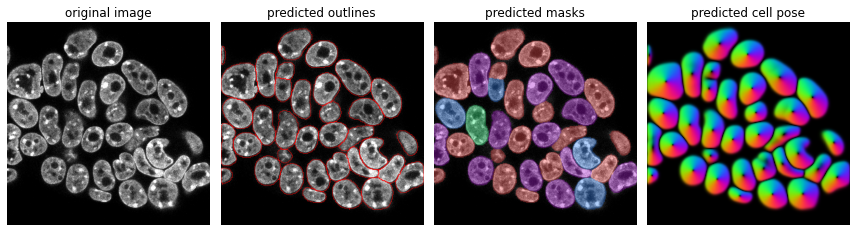

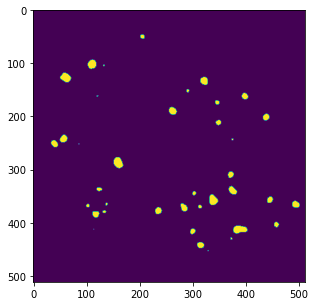

C:\Users\silvinm\AppData\Local\Temp/ipykernel_17440/988476184.py:100: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],


    Parent_label  Label  Mean_Intensity  Min_Intensity  Max_Intensity
34           0.0     35       85.000000             85             85
0            1.0      1       91.240741             38            159
2            4.0      3       89.142857             65            107
7            4.0      8       63.200000             46             85
1            4.0      2      126.959091             30            244
4            5.0      5      115.011628             29            216
8            5.0      9       95.264151             38            171
3            7.0      4      113.359073             35            212
5            8.0      6       99.240000             62            155
9            8.0     10       90.387879             37            175
6           10.0      7      100.837838             30            215
10          10.0     11      111.438017             25            219
12          12.0     13      100.922078             33            175
14          12.0    

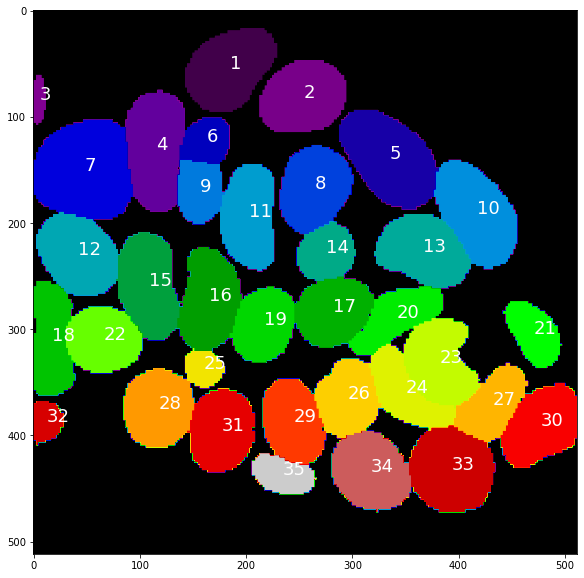

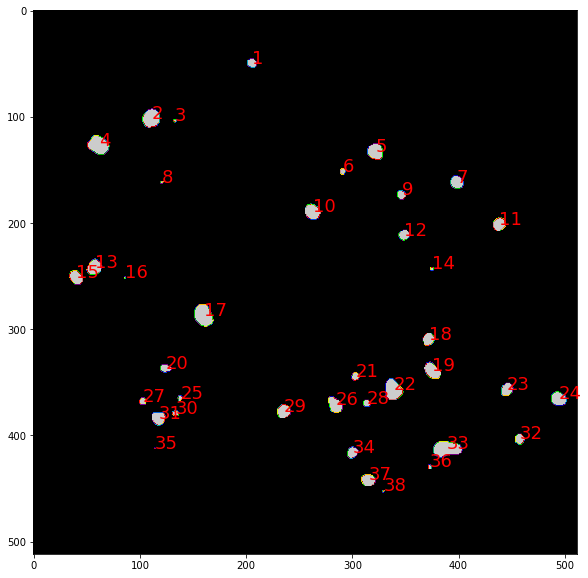

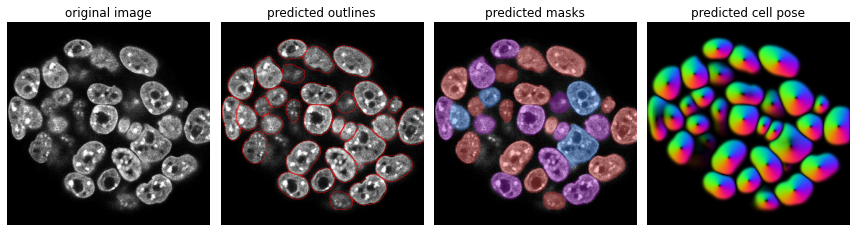

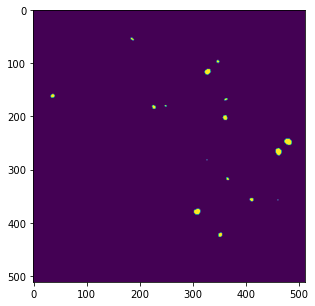

C:\Users\silvinm\AppData\Local\Temp/ipykernel_17440/988476184.py:100: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],


    Parent_label  Label  Mean_Intensity  Min_Intensity  Max_Intensity
0            1.0      1      102.050000             75            129
1            2.0      2      113.954545             63            145
2            2.0      3      128.064516             65            188
3            6.0      4      109.790698             74            151
4            7.0      5      102.894737             71            132
7            7.0      8      114.934426             63            193
5            8.0      6      101.789474             69            130
6            8.0      7       95.222222             81            113
8           17.0      9      134.894737             70            230
9           17.0     10      138.923729             62            224
10          21.0     11      112.500000            106            119
11          22.0     12      115.952381             79            155
14          25.0     15      119.121495             64            187
12          26.0    

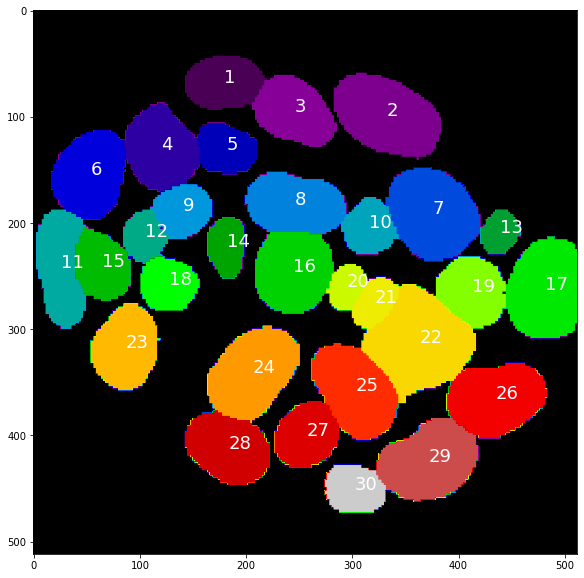

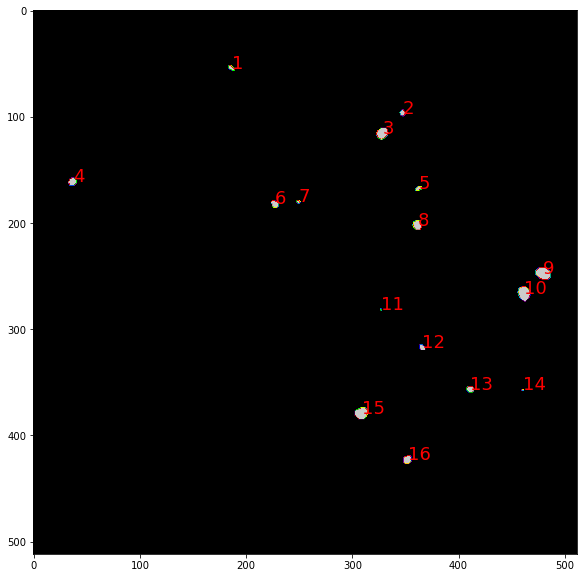

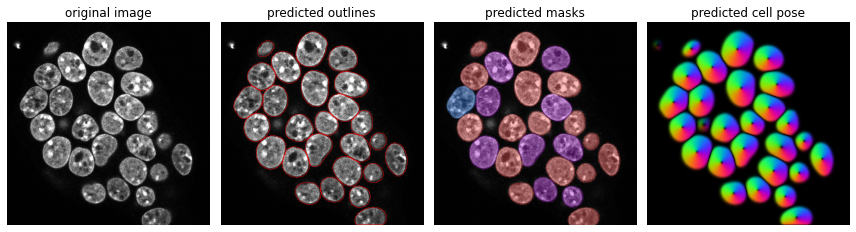

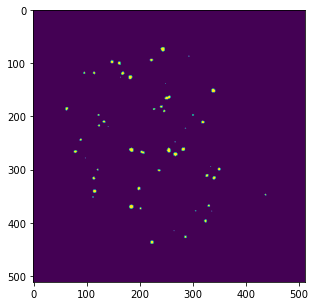

C:\Users\silvinm\AppData\Local\Temp/ipykernel_17440/988476184.py:100: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],


    Parent_label  Label  Mean_Intensity  Min_Intensity  Max_Intensity
0            1.0      1       86.800000             34            170
2            1.0      3       85.523810             50            140
1            3.0      2       96.500000             76            117
3            4.0      4       90.480000             42            160
4            4.0      5       82.769231             45            137
7            4.0      8       80.259259             38            109
8            4.0      9       81.682927             44            153
9            4.0     10      103.000000            103            103
5            5.0      6       94.700000             74            120
6            5.0      7       88.800000             63            134
16           6.0     17       84.538462             63            104
13           6.0     14       81.058824             56            146
15           6.0     16       80.636364             56            102
10           6.0    

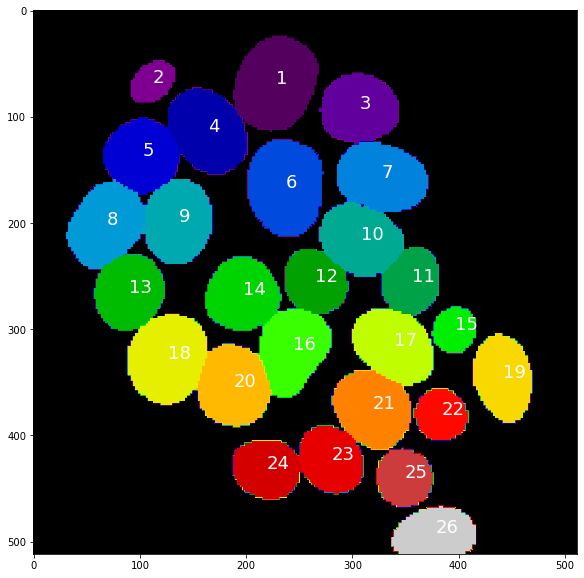

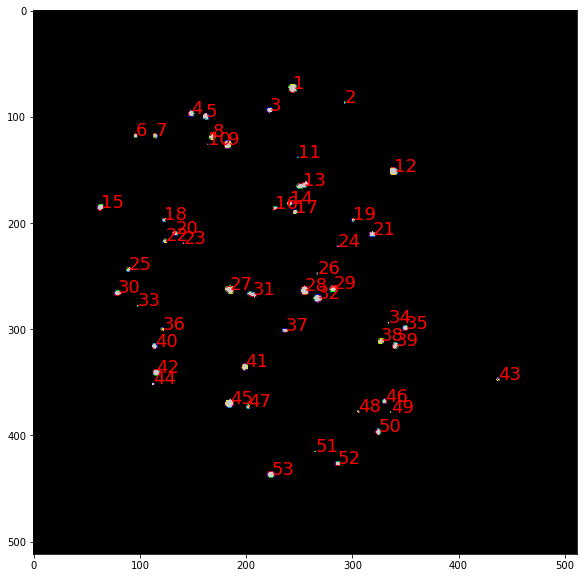

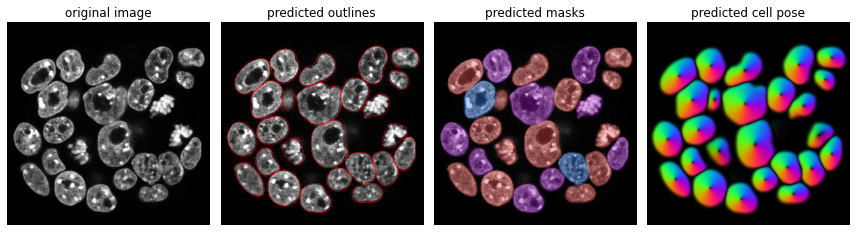

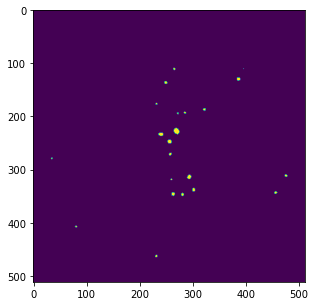

C:\Users\silvinm\AppData\Local\Temp/ipykernel_17440/988476184.py:100: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],


    Parent_label  Label  Mean_Intensity  Min_Intensity  Max_Intensity
1            1.0      2       88.000000             88             88
2            1.0      3      102.625000             53            190
0            4.0      1       97.615385             83            116
3            4.0      4       99.666667             69            143
5            7.0      6      105.421053             46            182
9            9.0     10       86.673913             56            131
8            9.0      9       99.956989             26            255
10           9.0     11       98.755556             43            209
6            9.0      7       86.666667             62            113
4            9.0      5      103.777778             70            130
7            9.0      8       99.750000             76            117
11          13.0     12      111.000000             68            198
14          13.0     15      111.680851             38            224
15          13.0    

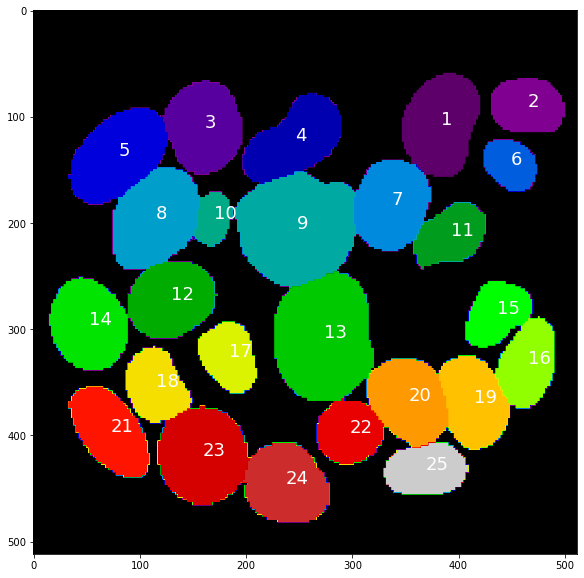

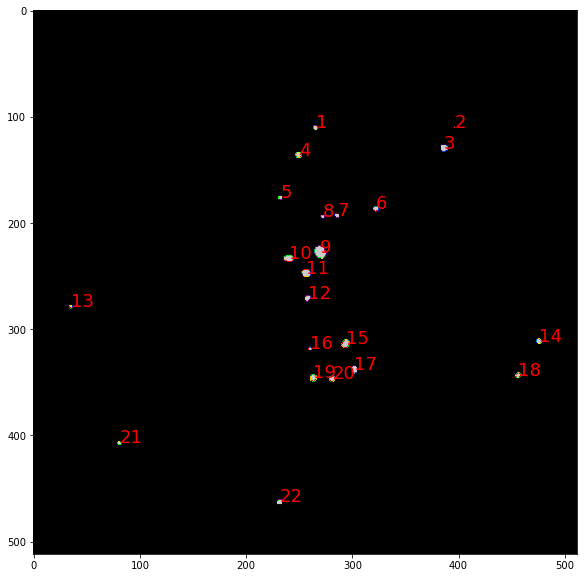

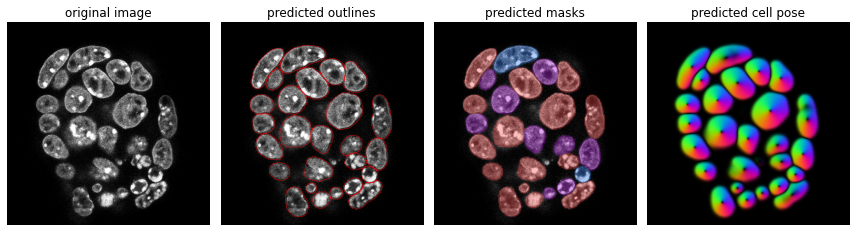

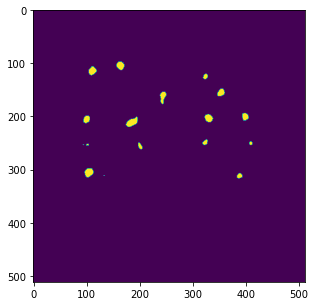

C:\Users\silvinm\AppData\Local\Temp/ipykernel_17440/988476184.py:100: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],


    Parent_label  Label  Mean_Intensity  Min_Intensity  Max_Intensity
0            1.0      1       81.307263             27            171
1            2.0      2       69.465517             34            150
2            4.0      3       69.507463             35            101
3            4.0      4       82.931507             32            146
4            5.0      5       62.505814             30            135
8            7.0      9       83.600000             26            167
6            8.0      7       87.693182             21            164
9            8.0     10       68.971831             29            134
7            9.0      8       75.777778             33            120
10          10.0     11       58.818182             26             89
5           10.0      6       57.604478             31             94
12          11.0     13       62.857143             51             77
13          11.0     14       62.000000             51             73
11          12.0    

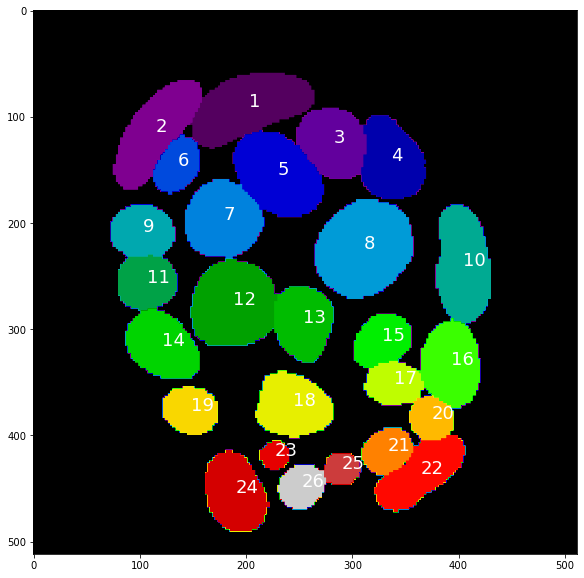

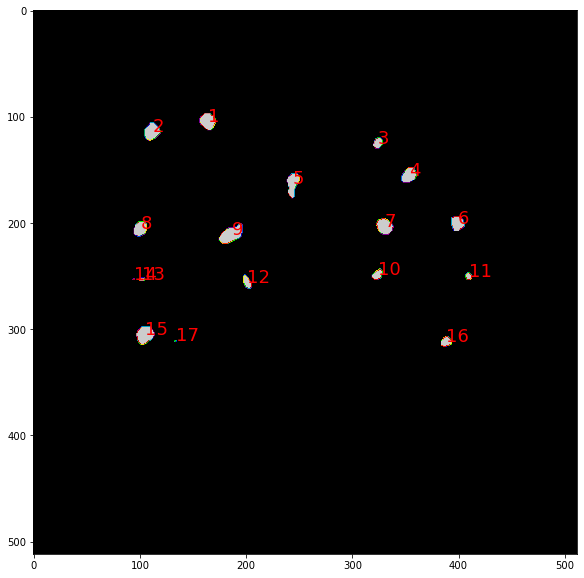

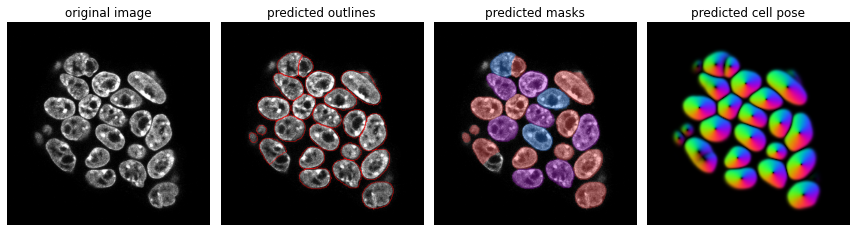

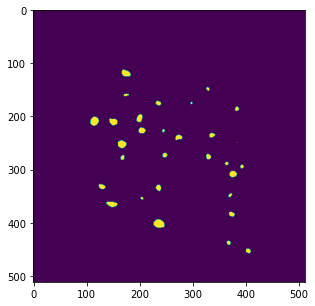

C:\Users\silvinm\AppData\Local\Temp/ipykernel_17440/988476184.py:100: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],


    Parent_label  Label  Mean_Intensity  Min_Intensity  Max_Intensity
25           0.0     26       89.275641             39            143
0            1.0      1       83.216867             33            132
3            3.0      4      100.200000             34            190
1            4.0      2       64.875000             42             91
5            4.0      6       68.666667             45            104
2            5.0      3       75.705882             51            109
4            6.0      5       75.692308             61            100
6            7.0      7       85.690476             28            157
9            7.0     10      105.408696             36            194
8            8.0      9       88.732026             38            176
7            8.0      8      113.909953             32            220
10           9.0     11       85.130435             52            130
12           9.0     13       73.416667             43            108
11          10.0    

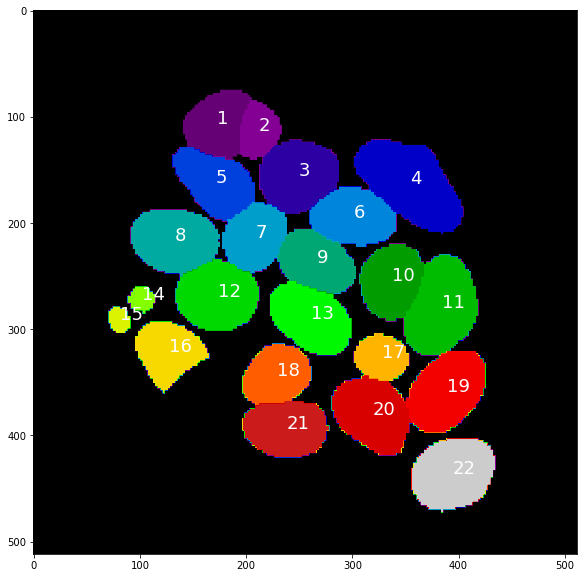

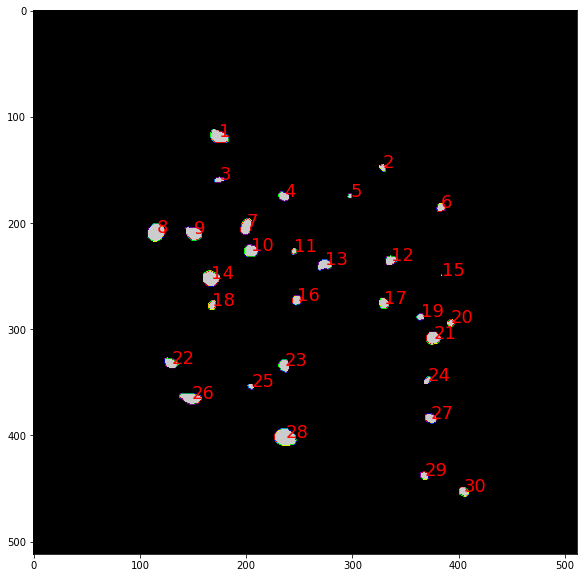

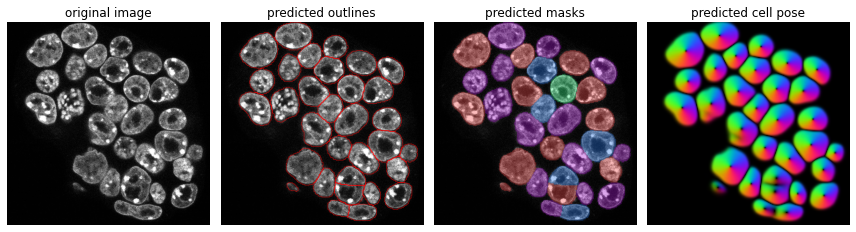

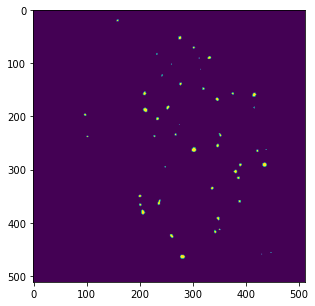

C:\Users\silvinm\AppData\Local\Temp/ipykernel_17440/988476184.py:100: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],


    Parent_label  Label  Mean_Intensity  Min_Intensity  Max_Intensity
5            0.0      6       45.500000             32             59
7            0.0      8       53.000000             53             53
0            1.0      1       69.500000             32            102
1            3.0      2       72.115385             34            128
2            3.0      3       71.181818             47             93
3            4.0      4       68.400000             57             82
4            5.0      5       70.600000             43            117
6            7.0      7       64.000000             47             81
8            7.0      9       68.666667             49             92
9            7.0     10       61.529412             42             85
14          10.0     15       62.851852             34            110
10          10.0     11       65.785714             46            101
11          11.0     12       62.642857             25            110
17          11.0    

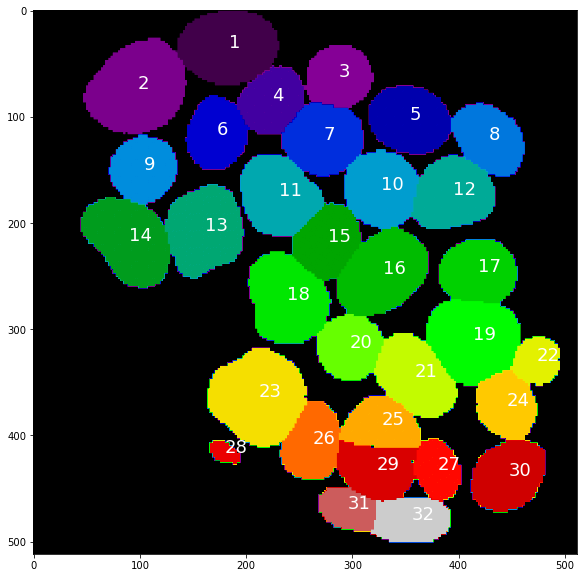

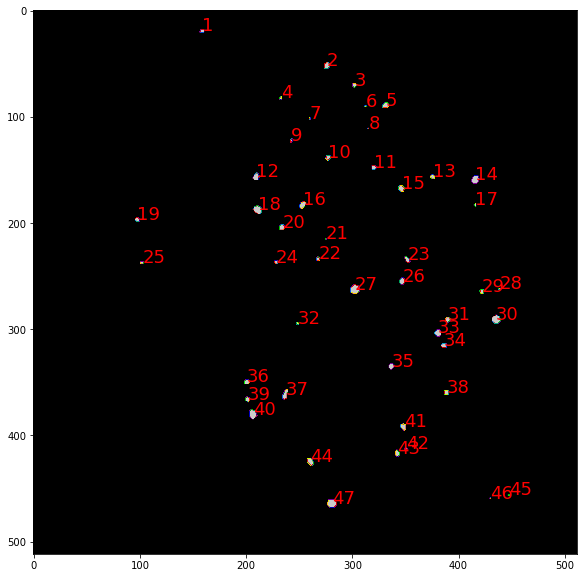

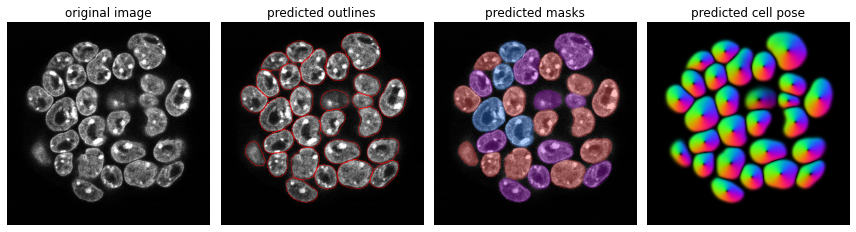

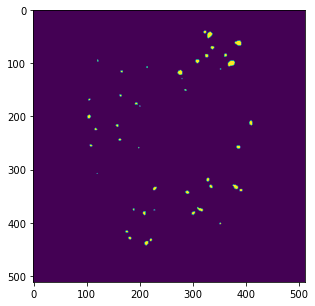

C:\Users\silvinm\AppData\Local\Temp/ipykernel_17440/988476184.py:100: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],


    Parent_label  Label  Mean_Intensity  Min_Intensity  Max_Intensity
14           0.0     15       42.000000             28             53
0            1.0      1       56.863636             32             86
1            1.0      2       60.756098             25            114
2            1.0      3       63.727273             10            118
3            1.0      4       53.548387             30             86
4            1.0      5       57.230769             37             87
5            1.0      6       53.090909             30             93
8            1.0      9       60.387387             18            105
10           1.0     11       64.000000             58             75
9            3.0     10       60.571429             48             74
6            4.0      7       59.285714             44             73
13           5.0     14       59.500000             54             65
11           5.0     12       52.857143             24             94
7            5.0    

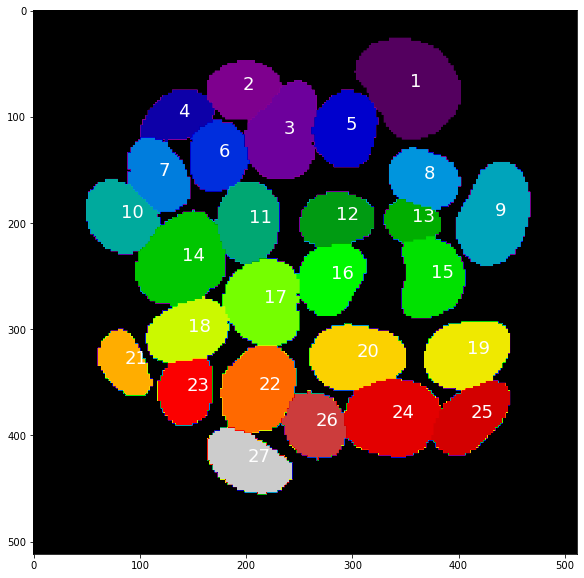

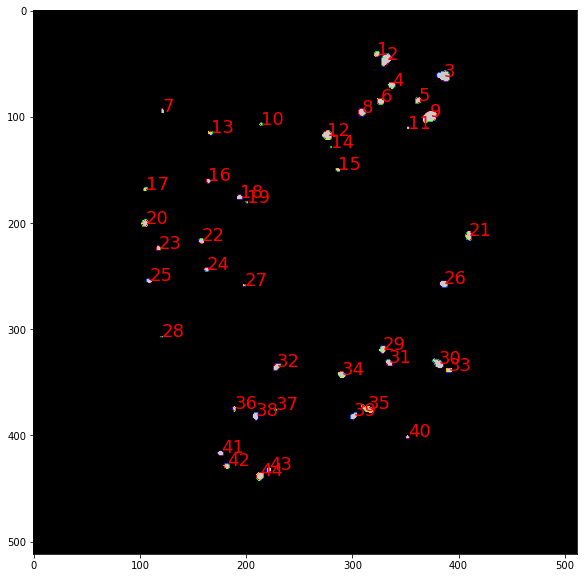

In [6]:
# =============================================================================
# Run Cellpose
# =============================================================================

model = models.Cellpose(gpu=False, model_type='cyto')


Impath = glob.glob(path+"/*.tif")
for img in Impath:
    image = io.imread(img)
    imagecv = skimage.io.imread(img)
    filename = os.path.basename(os.path.splitext(img)[0])
    print(filename)
    
    
    
    # =============================================================================
    # Verification de si il s'agit d'un stack ou d'une image 2D
    # ============================================================================= 
    imageS = image.shape
    if len(imageS) > 3:
        print("Je ne prends pas l'image " + filename +" car c'est un stack")
    else:
        channel1 = imagecv[:,:,0]
        channel3 = imagecv[:,:,2]
        
        
        
        # =============================================================================
        # Gaussian Blur et preparation à faire tourner cellpose
        # ============================================================================= 
        GB_imgs = filters.gaussian(channel3, 2)
       # define CHANNELS to run segementation on
       # grayscale=0, R=1, G=2, B=3
       # channels = [cytoplasm, nucleus]
       # if NUCLEUS channel does not exist, set the second channel to 0
        channels = [0,0]

        # if diameter is set to None, the size of the cells is estimated on a per image basis
        # you can set the average cell `diameter` in pixels yourself (recommended)
        # diameter can be a list or a single number for all images

        
        
        
        # =============================================================================
        # Detection des noyaux via cellpose
        # ============================================================================= 
        masks, flows, styles, diams = model.eval(GB_imgs, diameter=70, channels=channels)
    #     masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)


        fig = plt.figure(figsize=(12,5))
        plot.show_segmentation(fig, channel3, masks,flows[0],channels=channels)
        plt.tight_layout()
        plt.show()

        # image_name is file name of image
        # masks is numpy array of masks for image
#         base = os.path.splitext(img)[0]
# #         outlines = utils.outlines_list(masks)
# #         io.outlines_to_text(base, outlines)
# #         io.masks_flows_to_seg(imgs, masks, flows, diams, img, channels)
#         io.save_to_png(image, masks, flows, img)
    
    
    
        # =============================================================================
        # Seuillage des spots sur channel0 
        # ============================================================================= 
        blurred_image_spots = skimage.filters.gaussian(channel1, 2)
        thresh = threshold_yen(blurred_image_spots)
        binary_mask = blurred_image_spots > thresh
        
        fig = plt.figure(figsize=(12,5))
        plt.imshow(binary_mask)
        plt.show()
        
        
        
        # =============================================================================
        # Mise en relation des spots en fonction des noyaux
        # ============================================================================= 
        binary_mask_label = skimage.measure.label(binary_mask)
        properties=skimage.measure.regionprops_table(binary_mask_label, imagecv, properties= ['label','area', 'mean_intensity',
                                                                                            'min_intensity','max_intensity',
                                                                                            'equivalent_diameter','major_axis_length',
                                                                                            'minor_axis_length'])
        binary_ch=binary_mask_label>0
        corresponding_parents=masks*binary_ch
        
        properties_CorrespondingParent= skimage.measure.regionprops_table(binary_mask_label, masks, properties=['max_intensity'])
        
        
        
        # =============================================================================
        # Sortie en Dataframe des mesures d'intensités
        # ============================================================================= 
        prop = {}
        prop={'Parent_label': properties_CorrespondingParent['max_intensity'].astype(np.float),'Label': properties['label'], 'Mean_Intensity': properties['mean_intensity-0'],'Min_Intensity': properties['min_intensity-0'],
              'Max_Intensity': properties['max_intensity-0']
                } 
        
        df = pd.DataFrame(prop)
        df = DataFrame.sort_values(df, by = 'Parent_label')
        print(df)
#         save to csv
        df.to_csv(pathResult +"/" + filename + ".csv")
    
    
        
        # =============================================================================
        # Sauvegarde d'un png avec les noyaux labellisés
        # =============================================================================    
        fig, axs = plt.subplots(1, 1, figsize=(10,10))
        axs.imshow(masks, cmap='nipy_spectral')

        regionprops = skimage.measure.regionprops(masks)
        # Plot label number over each element (iterate over each element)
        for element in regionprops:
            # Get element centroid (x, y)
            element_centroid = (element.centroid[1], element.centroid[0])

            # Get element label and convert it to string
            element_label = str(element.label)

            # Plot label number at the coordinates of that element centroid
            axs.annotate(text = element_label, xy = element_centroid, fontsize = 18, color = 'white')

            fig.savefig(filename + "_labelednuclei.png")
            
        
        # =============================================================================
        # Sauvegarde d'un png avec les dots labellisés
        # =============================================================================    
        fig, axs = plt.subplots(1, 1, figsize=(10,10))
        axs.imshow(binary_mask, cmap='nipy_spectral')


        regionprops_dots = skimage.measure.regionprops(binary_mask_label)
        # Plot label number over each element (iterate over each element)
        for element in regionprops_dots:
            # Get element centroid (x, y)
            element_centroid = (element.centroid[1], element.centroid[0])

            # Get element label and convert it to string
            element_label = str(element.label)

            # Plot label number at the coordinates of that element centroid
            axs.annotate(text = element_label, xy = element_centroid, fontsize = 18, color = 'red')
            
        fig.savefig(filename + "_labeledspots.png")
    
    

# =============================================================================
# Moving png and txt to a result folder
# =============================================================================    

# Move .png
pngpath = glob.glob(path+"/*.png")
for files in pngpath:
    shutil.move(files,pathResult)

    
# Move .txt
txtpath = glob.glob(path+"/*.txt")
for files in txtpath:
    shutil.move(files,pathResult)
